In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import math

In [2]:
# read files
img_1 = cv2.imread('images/IMG-1.jpg')
img_2 = cv2.imread('images/IMG-2.jpg')
img_3 = cv2.imread('images/IMG-3.jpg')
img_4 = cv2.imread('images/IMG-4.jpg')
img_5 = cv2.imread('images/IMG-5.jpg')

In [3]:
def show_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # change color channels 
    plt.imshow(image)
    plt.show()
    
def to_grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

In [4]:
def gamma_corr_luminance(image, gamma):
    yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    for i in range(yuv_image.shape[0]):
        for j in range(yuv_image.shape[1]):
            value = yuv_image[i][j][0]
            yuv_image[i][j][0] = (value/255)**gamma * 255 # normalization
    new_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)
    return new_image

def gamma_corr_rgb(image, gamma):
    # formula: output_intensity = c * input_intensity**gamma
    new_image = np.zeros(image.shape, dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for c in range(3):
                value = image[i][j][c]
                new_image[i][j][c] = (value/255)**gamma * 255
    return new_image

In [5]:
def gaussian_noise(image, mean, sigma):
    noise = np.random.normal(mean, sigma, image.shape)
    new_image = np.zeros(image.shape, dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            value = image[i][j] / 255
            value = value + noise[i][j]
            if value > 1: value = 1
            elif value < 0: value = 0
            new_image[i][j] = value * 255
    return new_image

In [6]:
def sp_noise(image):
    n_pixels = int(image.shape[0] * image.shape[1] / 10)
    new_image = image.copy()
    for i in range(n_pixels):
        y_index = random.randint(0, image.shape[0]-1)
        x_index = random.randint(0, image.shape[1]-1)
        new_image[y_index][x_index] = 255
    for i in range(n_pixels):
        y_index = random.randint(0, image.shape[0]-1)
        x_index = random.randint(0, image.shape[1]-1)
        new_image[y_index][x_index] = 0
    return new_image

In [7]:
def gaussian_filter(image, mask_size, sigma):
    g_filter = []
    total = 0
    for i in range(mask_size):
        row_list = []
        for j in range(mask_size):
            x = -mask_size//2 + j + 1
            y = -mask_size//2 + i + 1
            ans = ( (1 / (2*math.pi*sigma**2)) * 
                    math.exp(-( (x**2 + y**2) / (2*sigma**2) )) )
            row_list.append(ans)
            total += ans
        g_filter.append(row_list)
    g_filter = np.array(g_filter)
    
    # normalization
    for i in range(mask_size): 
        for j in range(mask_size):
            g_filter[i][j] = g_filter[i][j] / total
            
    new_image = np.zeros(image.shape, dtype='uint8')
    # filtering
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_value = 0
            for p in range(mask_size):
                for q in range(mask_size):
                    y_index = i - mask_size//2 + p
                    x_index = j - mask_size//2 + q
                    if y_index < 0 or x_index < 0: pixel_value = 0
                    elif (y_index >= image.shape[0] 
                          or x_index >= image.shape[1]): pixel_value = 0
                    else: pixel_value = image[y_index][x_index]
                    new_value += pixel_value * g_filter[q][p]
            new_image[i][j] = new_value
    return new_image 

In [8]:
def median_filter(image, mask_size):
    new_image = np.zeros(image.shape, dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            mask_list = []
            for p in range(mask_size):
                for q in range(mask_size):
                    y_index = i - mask_size//2 + p
                    x_index = j - mask_size//2 + q
                    if y_index < 0 or x_index < 0: mask_list.append(0)
                    elif (y_index >= image.shape[0] 
                          or x_index >= image.shape[1]): mask_list.append(0)
                    else: mask_list.append(image[y_index][x_index])
            mask_list.sort()
            m = mask_list[(mask_size * mask_size) // 2]
            new_image[i][j] = m
    return new_image

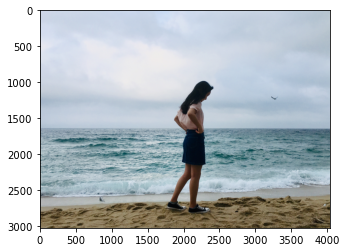

In [9]:
show_image(img_1)

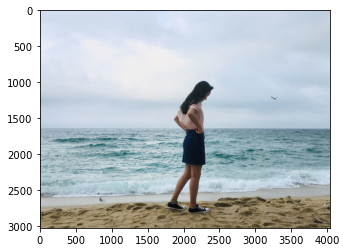

True

In [10]:
img_1_gamma_lumin = gamma_corr_luminance(img_1, 0.8)
show_image(img_1_gamma_lumin)
cv2.imwrite('result_images/IMG-1-1.jpg', img_1_gamma_lumin)

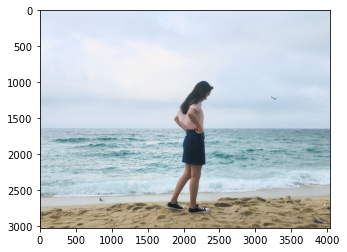

True

In [11]:
img_1_gamma_lumin = gamma_corr_luminance(img_1, 0.6)
show_image(img_1_gamma_lumin)
cv2.imwrite('result_images/IMG-1-2.jpg', img_1_gamma_lumin)

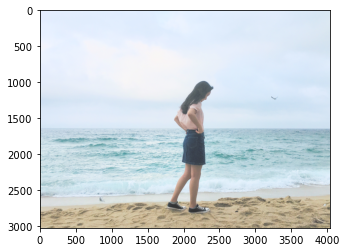

True

In [12]:
img_1_gamma_lumin = gamma_corr_luminance(img_1, 0.4)
show_image(img_1_gamma_lumin)
cv2.imwrite('result_images/IMG-1-3.jpg', img_1_gamma_lumin)

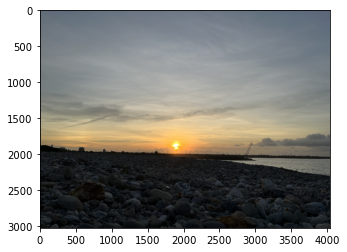

In [13]:
show_image(img_2)

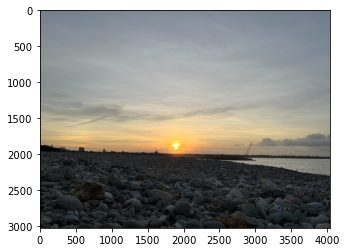

True

In [14]:
img_2_gamma_lumin = gamma_corr_luminance(img_2, 0.8)
show_image(img_2_gamma_lumin)
cv2.imwrite('result_images/IMG-2-1.jpg', img_2_gamma_lumin)

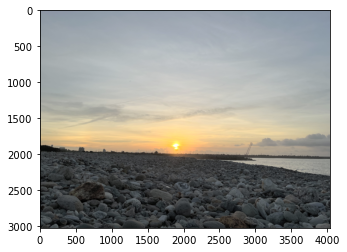

True

In [15]:
img_2_gamma_lumin = gamma_corr_luminance(img_2, 0.6)
show_image(img_2_gamma_lumin)
cv2.imwrite('result_images/IMG-2-2.jpg', img_2_gamma_lumin)

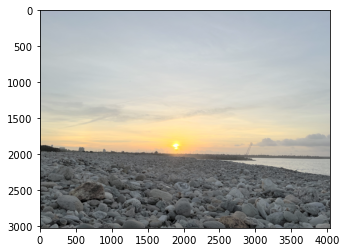

True

In [16]:
img_2_gamma_lumin = gamma_corr_luminance(img_2, 0.4)
show_image(img_2_gamma_lumin)
cv2.imwrite('result_images/IMG-2-3.jpg', img_2_gamma_lumin)

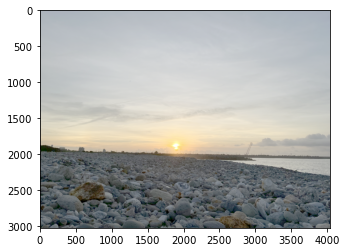

True

In [17]:
img_2_gamma = gamma_corr_rgb(img_2, 0.4)
show_image(img_2_gamma)
cv2.imwrite('result_images/IMG-2-4.jpg', img_2_gamma)

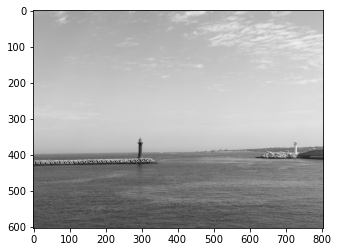

True

In [18]:
img_3_small = cv2.resize(img_3, 
                         (int(img_3.shape[1]/5), int(img_3.shape[0]/5)), 
                         interpolation=cv2.INTER_AREA)
img_3_gray = to_grayscale(img_3_small)
show_image(img_3_gray)
cv2.imwrite('result_images/IMG-3-gray.jpg', img_3_gray)

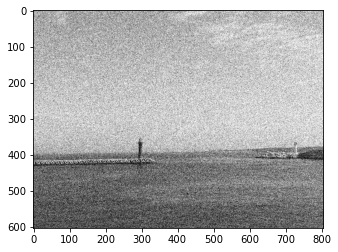

True

In [19]:
img_3_gnoise = gaussian_noise(img_3_gray, 0, 0.2)
show_image(img_3_gnoise)
cv2.imwrite('result_images/IMG-3-gnoise.jpg', img_3_gnoise)

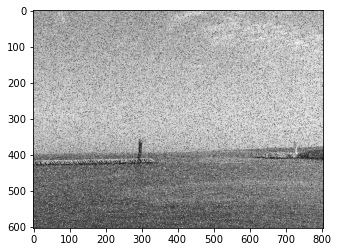

True

In [20]:
img_3_spnoise = sp_noise(img_3_gray)
show_image(img_3_spnoise)
cv2.imwrite('result_images/IMG-3-spnoise.jpg', img_3_spnoise)

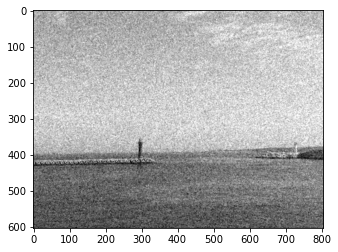

True

In [21]:
img_3_filtered = median_filter(img_3_gnoise, 3)
show_image(img_3_filtered)
cv2.imwrite('result_images/IMG-3-g-median-3.jpg', img_3_filtered)

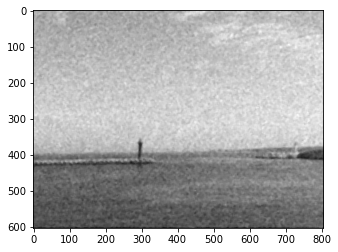

True

In [22]:
img_3_filtered = median_filter(img_3_gnoise, 7)
show_image(img_3_filtered)
cv2.imwrite('result_images/IMG-3-g-median-7.jpg', img_3_filtered)

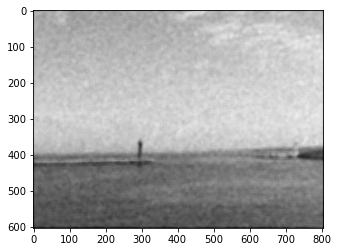

True

In [23]:
img_3_filtered = median_filter(img_3_gnoise, 11)
show_image(img_3_filtered)
cv2.imwrite('result_images/IMG-3-g-median-11.jpg', img_3_filtered)

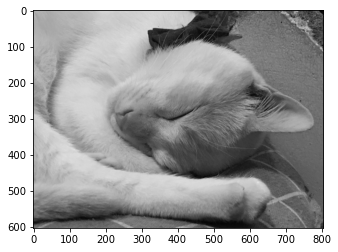

True

In [26]:
img_4_small = cv2.resize(img_4, 
                         (int(img_4.shape[1]/5), int(img_4.shape[0]/5)), 
                         interpolation=cv2.INTER_AREA)
img_4_gray = to_grayscale(img_4_small)
show_image(img_4_gray)
cv2.imwrite('result_images/IMG-4-gray.jpg', img_4_gray)

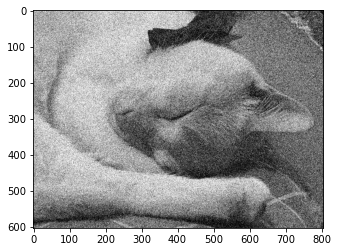

True

In [27]:
img_4_gnoise = gaussian_noise(img_4_gray, 0, 0.2)
show_image(img_4_gnoise)
cv2.imwrite('result_images/IMG-4-gnoise.jpg', img_4_gnoise)

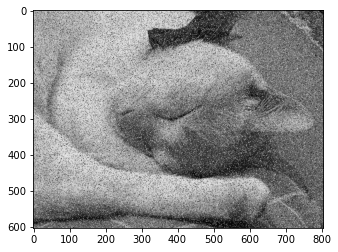

True

In [28]:
img_4_spnoise = sp_noise(img_4_gray)
show_image(img_4_spnoise)
cv2.imwrite('result_images/IMG-4-spnoise.jpg', img_4_spnoise)

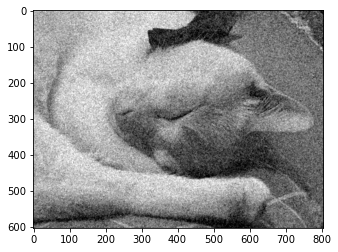

True

In [29]:
img_4_filtered = median_filter(img_4_gnoise, 3)
show_image(img_4_filtered)
cv2.imwrite('result_images/IMG-4-g-medain-3.jpg', img_4_filtered)

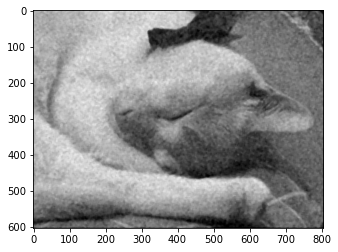

True

In [30]:
img_4_filtered = median_filter(img_4_gnoise, 7)
show_image(img_4_filtered)
cv2.imwrite('result_images/IMG-4-g-medain-7.jpg', img_4_filtered)

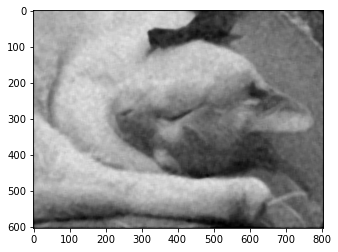

True

In [31]:
img_4_filtered = median_filter(img_4_gnoise, 11)
show_image(img_4_filtered)
cv2.imwrite('result_images/IMG-4-g-medain-11.jpg', img_4_filtered)

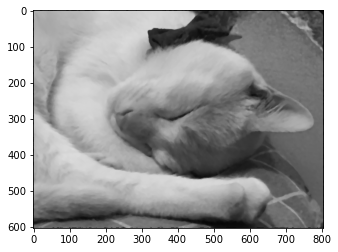

True

In [32]:
img_4_filtered = median_filter(img_4_spnoise, 7)
show_image(img_4_filtered)
cv2.imwrite('result_images/IMG-4-sp-medain-7.jpg', img_4_filtered)

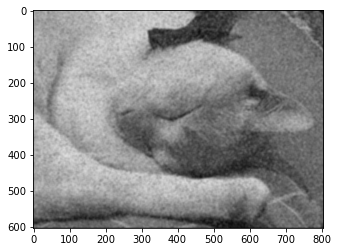

True

In [53]:
img_4_filtered = gaussian_filter(img_4_spnoise, 7, 5)
show_image(img_4_filtered)
cv2.imwrite('result_images/IMG-4-sp-g-7-5.jpg', img_4_filtered)

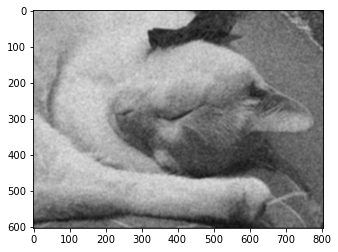

True

In [52]:
img_4_filtered = gaussian_filter(img_4_gnoise, 7, 5)
show_image(img_4_filtered)
cv2.imwrite('result_images/IMG-4-g-g-7-5.jpg', img_4_filtered)

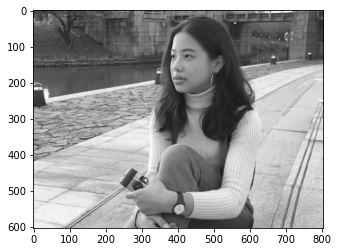

True

In [35]:
img_5_small = cv2.resize(img_5, 
                         (int(img_5.shape[1]/5), int(img_5.shape[0]/5)), 
                         interpolation=cv2.INTER_AREA)
img_5_gray = to_grayscale(img_5_small)
show_image(img_5_gray)
cv2.imwrite('result_images/IMG-5-gray.jpg', img_5_gray)

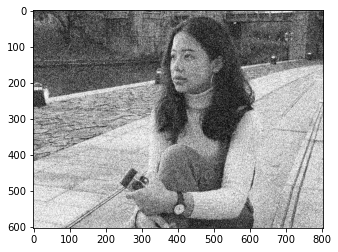

True

In [36]:
img_5_gnoise = gaussian_noise(img_5_gray, 0, 0.2)
show_image(img_5_gnoise)
cv2.imwrite('result_images/IMG-5-gnoise.jpg', img_5_gnoise)

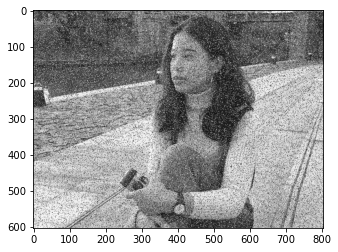

True

In [37]:
img_5_spnoise = sp_noise(img_5_gray)
show_image(img_5_spnoise)
cv2.imwrite('result_images/IMG-5-spnoise.jpg', img_5_spnoise)

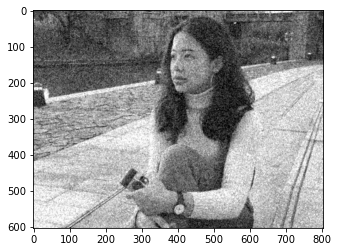

True

In [38]:
img_5_filtered = median_filter(img_5_gnoise, 3)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-median-3.jpg', img_5_filtered)

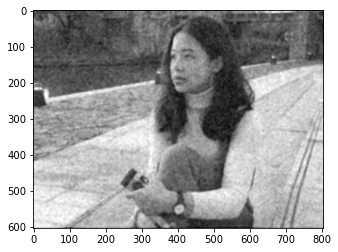

True

In [39]:
img_5_filtered = median_filter(img_5_gnoise, 7)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-median-7.jpg', img_5_filtered)

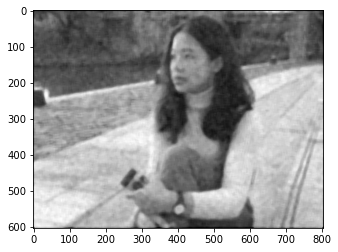

True

In [40]:
img_5_filtered = median_filter(img_5_gnoise, 11)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-median-11.jpg', img_5_filtered)

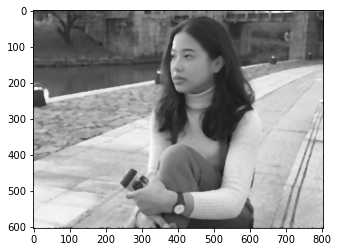

True

In [41]:
img_5_filtered = median_filter(img_5_spnoise, 7)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-sp-median-7.jpg', img_5_filtered)

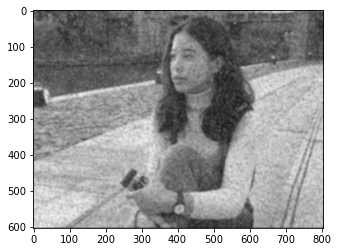

True

In [54]:
img_5_filtered = gaussian_filter(img_5_spnoise, 7, 5)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-sp-g-7-5.jpg', img_5_filtered)

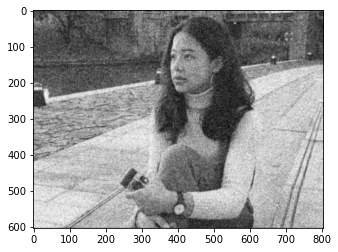

True

In [43]:
img_5_filtered = gaussian_filter(img_5_gnoise, 7, 1)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-7-1.jpg', img_5_filtered)

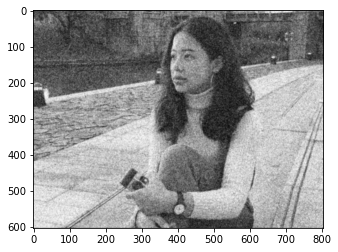

True

In [44]:
img_5_filtered = gaussian_filter(img_5_gnoise, 11, 1)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-11-1.jpg', img_5_filtered)

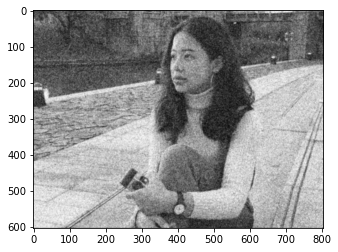

True

In [45]:
img_5_filtered = gaussian_filter(img_5_gnoise, 13, 1)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-13-1.jpg', img_5_filtered)

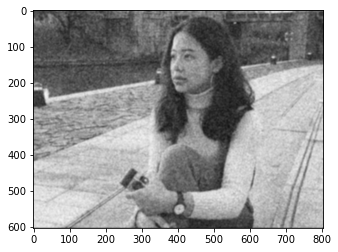

True

In [46]:
img_5_filtered = gaussian_filter(img_5_gnoise, 7, 2)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-7-2.jpg', img_5_filtered)

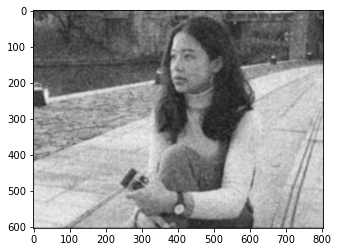

True

In [47]:
img_5_filtered = gaussian_filter(img_5_gnoise, 11, 2)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-11-2.jpg', img_5_filtered)

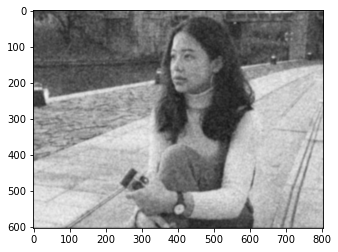

True

In [48]:
img_5_filtered = gaussian_filter(img_5_gnoise, 13, 2)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-13-2.jpg', img_5_filtered)

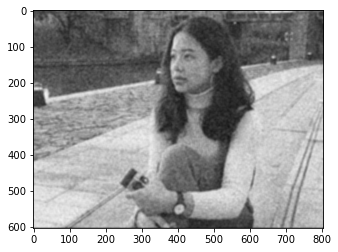

True

In [49]:
img_5_filtered = gaussian_filter(img_5_gnoise, 7, 5)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-7-5.jpg', img_5_filtered)

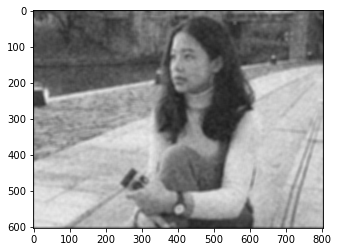

True

In [50]:
img_5_filtered = gaussian_filter(img_5_gnoise, 11, 5)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-11-5.jpg', img_5_filtered)

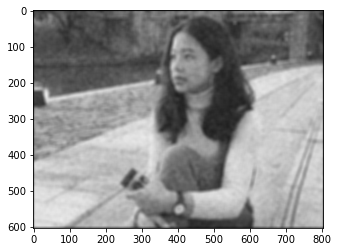

True

In [51]:
img_5_filtered = gaussian_filter(img_5_gnoise, 13, 5)
show_image(img_5_filtered)
cv2.imwrite('result_images/IMG-5-g-g-13-5.jpg', img_5_filtered)